In [ ]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
%matplotlib inline

# Step 0: Load the data

In [ ]:
dbestancia = pd.read_csv('/content/db_estancia.csv')

# Step 1: Preview the first 5 rows

In [ ]:
dbestancia.head()

,FECHA_INGRESO,FECHA_DEF,EDAD,NEUMONIA,EMBARAZO,DIABETES,EPOC,ASMA,INMUSUPR,HIPERTENSION,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO
0,18471,0.0,35.0,2.0,97.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
1,18425,0.0,56.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
2,18415,0.0,58.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
3,18444,0.0,37.0,2.0,97.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
4,18481,0.0,71.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0


# Step 2: Prepare the output

In [ ]:
target = dbestancia['FECHA_DEF']

# Step 3: Split into Training/Validation dataset

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
vars_names = list(dbestancia.keys().drop(['FECHA_DEF','FECHA_INGRESO']))
inputs = dbestancia[vars_names]
inputs.head()

,EDAD,NEUMONIA,EMBARAZO,DIABETES,EPOC,ASMA,INMUSUPR,HIPERTENSION,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO
0,35.0,2.0,97.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
1,56.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
2,58.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
3,37.0,2.0,97.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
4,71.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(inputs, target, test_size=0.40) # 60% train
                                                                                    # 40% test

In [ ]:
X_test2, X_valid, y_test2, y_valid = train_test_split(X_test, y_test, test_size=0.50) # 50% train
                                                                                    # 50% validation

#Matriz correlacion

In [ ]:
vars_names2 = list(dbestancia.keys().drop(['FECHA_INGRESO']))
corr = dbestancia[vars_names2]

In [ ]:
def fcn_corr_matrix(corr_mat):
    '''
    Función para convertir una matriz de correlación de pandas en formato tidy
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['var_1','var_2','r']
    corr_mat = corr_mat.loc[corr_mat['var_1'] != corr_mat['var_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)

    return(corr_mat)

In [ ]:
corr_matrix = corr.select_dtypes(include=['int', 'float64']).corr(method='pearson')
fcn_corr_matrix(corr_matrix).head(10)

,var_1,var_2,r,abs_r
83,ASMA,EPOC,0.945553,0.945553
71,EPOC,ASMA,0.945553,0.945553
85,ASMA,INMUSUPR,0.943672,0.943672
97,INMUSUPR,ASMA,0.943672,0.943672
152,RENAL_CRONICA,CARDIOVASCULAR,0.942878,0.942878
128,CARDIOVASCULAR,RENAL_CRONICA,0.942878,0.942878
149,RENAL_CRONICA,ASMA,0.938191,0.938191
89,ASMA,RENAL_CRONICA,0.938191,0.938191
87,ASMA,CARDIOVASCULAR,0.937514,0.937514
123,CARDIOVASCULAR,ASMA,0.937514,0.937514


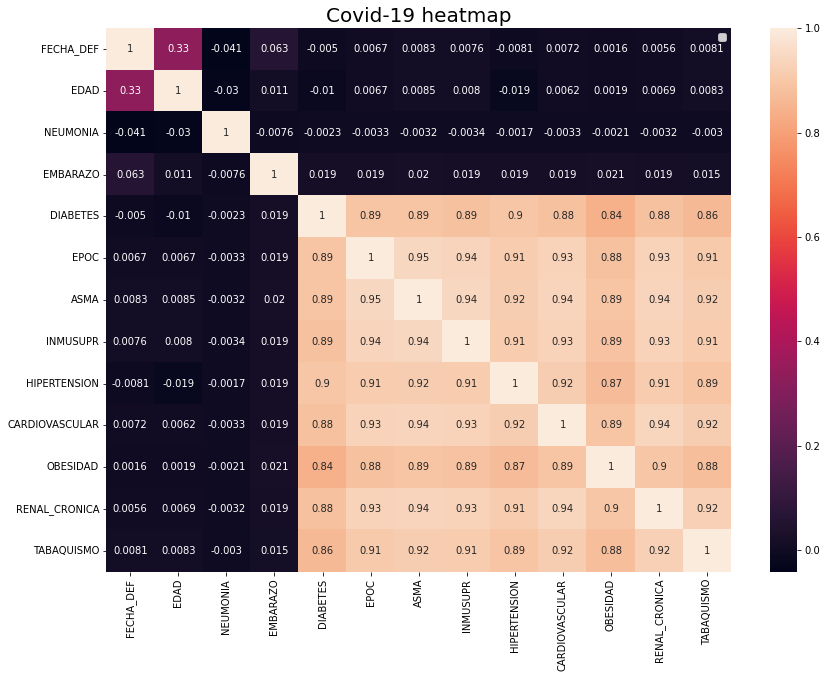

In [ ]:
from numpy.ma.core import size
import seaborn as sns
import matplotlib.pyplot as plt
#Graficamos nuestro mapa de calor
plt.figure(figsize = (14,10))
plt.title("Covid-19 heatmap", size=20)
sns.heatmap(corr_matrix, annot=True)


# Step 4: Normalize (if needed)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# copy the data
inputsN = inputs.copy()

# apply normalization techniques
column = 'EDAD'
inputsN[column] = MinMaxScaler(feature_range=(0.1, 0.9)).fit_transform(np.array(inputsN[column]).reshape(-1,1))

# view normalized data
display(inputsN)

,EDAD,NEUMONIA,EMBARAZO,DIABETES,EPOC,ASMA,INMUSUPR,HIPERTENSION,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO
0,0.331405,2.0,97.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
1,0.470248,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
2,0.483471,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
3,0.344628,2.0,97.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
4,0.569421,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2691034,0.291736,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
2691035,0.192562,2.0,97.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
2691036,0.516529,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0
2691037,0.311570,2.0,98.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0


# Step 5: Review the dimensions of training and validation set

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test2.shape)
print(y_test2.shape)
print(X_valid.shape)
print(y_valid.shape)

(1614623, 12)
(1614623,)
(538208, 12)
(538208,)
(538208, 12)
(538208,)


# Step 7: Create a neural network model
* 2 neurons in the hidden layer
* 1 neuron in the output layer

In [ ]:
from tensorflow.keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.utils.generic_utils import get_custom_objects

from keras import backend as K

In [ ]:
#Definimos nuestras funciones de avtivación tansig y logsig
def tansig(X):
    return (2/(1+K.exp(-2*X))-1)
get_custom_objects().update({'tansig': Activation(tansig)})  #make tansig function able to be called by keras

def Logsig(X):
    return (1/(1 + K.exp(-X)))
get_custom_objects().update({'logsig': Activation(Logsig)})




In [ ]:
model = Sequential()
model.add(Dense(2, input_dim = X_train.shape[1], activation = 'tanh'))
model.add(Dense(1, activation = 'sigmoid'))
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 26        
                                                                 
 dense_1 (Dense)             (None, 1)                 3         
                                                                 
Total params: 29
Trainable params: 29
Non-trainable params: 0
_________________________________________________________________
None


# Step 8: Compile the model
Checks if there are any cicles in the Sequential model

In [ ]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['AUC'], jit_compile = True)

# Step 9: Train the model
* We feed `X_train` into the model and the model calculates error using `y_train`
* In one epoch the model scans through the entire rows in the `X_train`
* Updating the number of epochs usually increases the accuracy of the model
* To observe the accuracy on the `VALIDATION` data during the training, add `validation_data = (X_test, y_test)`

In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
callback_a = ModelCheckpoint(filepath = 'my_best_model_12_2_1_rs.hdf5', monitor = 'val_loss', save_best_only = True, save_weights_only = True)
callback_b = EarlyStopping(monitor = 'val_loss', mode = 'min', patience = 20, verbose = 1)

In [ ]:
history = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 10,
                    batch_size = 15, callbacks = [callback_a, callback_b],
                    use_multiprocessing = True)

Epoch 1/10
107620/107642 [============================>.] - ETA: 0s - loss: 0.2384 - auc: 0.7694

InvalidArgumentError: ignored

# Step 10: Check the learning curves

In [ ]:
print(history.history['auc'])

[0.9321728348731995, 0.9369368553161621, 0.9373763203620911, 0.9374699592590332, 0.9374392628669739, 0.9374340772628784, 0.9376272559165955, 0.9379280805587769, 0.9377732276916504, 0.938407838344574]


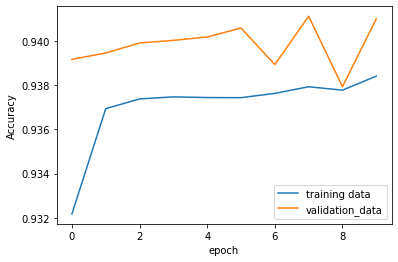

In [ ]:
plt.plot(history.history['auc'])
plt.plot(history.history['val_auc'])
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['training data', 'validation_data'], loc = 'lower right')
plt.show()

# Step 11: Evaluate the model on the training data
Here, we use the same data to train the model

In [ ]:
scores = model.evaluate(X_train, y_train)
print(model.metrics_names)
print(scores)
print("\n%s: %0.2f%%" % (model.metrics_names[1], scores[1]*100))

96914/96914 [==============================] - 129s 1ms/step - loss: 0.1187 - auc: 0.9415
['loss', 'auc']
[0.118723064661026, 0.9415338635444641]

auc: 94.15%


In [ ]:
from sklearn import metrics

def eval_model(target, estimations):
    return {
        #'ACC': metrics.accuracy_score(target, estimations),
        'PRE': metrics.average_precision_score(target, estimations),
        #'SEN': metrics.recall_score(target, estimations),
        #'F1': metrics.f1_score(target, estimations),
        'AuC': metrics.roc_auc_score(target, estimations)
    }

In [ ]:
# Making predictions
predicts_train = model.predict(X_train)
predicts_test = model.predict(X_test)
predicts_valid = model.predict(X_valid)

In [ ]:
results = {}

In [ ]:
results['train'] = eval_model(np.array(y_train).flatten(),predicts_train.ravel())
results['test'] = eval_model(np.array(y_test).flatten(),predicts_test.ravel())
results['Validation'] = eval_model(np.array(y_valid).flatten(), predicts_valid.ravel())

pd.DataFrame(results)

,train,test
PRE,0.528415,0.523340
AuC,0.942599,0.941956


# Step 12: Save the best model

In [ ]:
model.save(r'./annNormalized_tansig_logsig_.hdf5')

#Step 13: Validation Data

25 de Febrero-27 de Marzo

In [ ]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
d2bestancia = pd.read_csv('/content/covid_validationData (1).csv')

In [ ]:
d2bestancia.head(1500)

In [ ]:
db2 = d2bestancia.sort_values("FECHA_INGRESO")

In [ ]:
dbv = db2[db2["FECHA_INGRESO"] > "2022-02-25"]

In [ ]:
dbvn.to_csv('covid_validationData.csv')

NameError: ignored

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np


# copy the data
dbvn = d2bestancia.copy()

# apply normalization techniques
column = 'EDAD'
dbvn[column] = MinMaxScaler(feature_range=(0.1, 0.9)).fit_transform(np.array(dbvn[column]).reshape(-1,1))

# view normalized data
display(dbvn)

,FECHA_INGRESO,FECHA_DEF,EDAD,NEUMONIA,EMBARAZO,DIABETES,EPOC,ASMA,INMUSUPR,HIPERTENSION,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO
0,2022-03-02,0,0.556,2,2,2,2,2,2,2,2,2,2,2
1,2022-03-04,0,0.844,2,2,2,2,2,2,2,1,2,2,2
2,2022-03-01,0,0.540,1,2,1,2,2,2,1,2,1,1,2
3,2022-03-01,0,0.108,1,2,2,2,2,2,2,2,2,2,2
4,2022-03-15,0,0.340,2,2,2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1587,2022-03-27,0,0.628,1,2,1,2,2,1,2,2,2,2,2
1588,2022-03-26,0,0.724,2,2,1,2,2,2,1,2,1,1,1
1589,2022-03-28,0,0.316,2,1,2,2,2,2,2,2,2,2,2
1590,2022-03-13,0,0.812,1,2,2,2,2,2,2,2,2,2,2


In [ ]:
#dbvn = pd.read_csv("/content/covid_validationData.csv")
vars_names = list(dbvn.keys().drop(['FECHA_DEF','FECHA_INGRESO']))
validation = dbvn[vars_names]
validation.head()

,EDAD,NEUMONIA,EMBARAZO,DIABETES,EPOC,ASMA,INMUSUPR,HIPERTENSION,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO
0,0.556,2,2,2,2,2,2,2,2,2,2,2
1,0.844,2,2,2,2,2,2,2,1,2,2,2
2,0.540,1,2,1,2,2,2,1,2,1,1,2
3,0.108,1,2,2,2,2,2,2,2,2,2,2
4,0.340,2,2,2,2,2,2,2,2,2,2,2


#Step 14. Make predictions with validation data

In [ ]:
import keras
modelTL = keras.models.load_model('/content/annNormalized_tansig_logsig_.hdf5')
#modelLL = keras.models.load_model("/content/annNormalized_logsig_logsig_.hdf5")

In [ ]:
target = d2bestancia['FECHA_DEF']
#X_train, X_test, y_train, y_test = train_test_split(validation, target, test_size=1) #test 100%

In [ ]:
from sklearn import metrics

def eval_model(target, estimations):
    return {
        #'ACC': metrics.accuracy_score(target, estimations),
        'PRE': metrics.average_precision_score(target, estimations),
        #'SEN': metrics.recall_score(target, estimations),
        #'F1': metrics.f1_score(target, estimations),
        'AuC': metrics.roc_auc_score(target, estimations)
    }

In [ ]:
predicts_validation = modelTL.predict(validation)
#predicts_validation2 = modelLL.predict(validation)

results = {}
results['Validation'] = eval_model(target, predicts_validation)
#print(np.array(predicts_validation))
pd.DataFrame(results)

,Validation
AuC,0.691571
PRE,0.286461


In [ ]:
predic

,Validation
AuC,0.691571
PRE,0.286461


In [ ]:
print(predicts_validation)

[[0.11891094]
 [0.35702392]
 [0.6302096 ]
 ...
 [0.00347608]
 [0.64307034]
 [0.21882209]]


In [ ]:
scores = modelTL.evaluate(validation, target)
print(modelTL.metrics_names)
print(scores)
print("\n%s: %0.2f%%" % (modelTL.metrics_names[1], scores[1]*100))

50/50 [==============================] - 1s 3ms/step - loss: 0.5214 - auc: 0.6934
['loss', 'auc']
[0.5214160680770874, 0.6933798789978027]

auc: 69.34%
